In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
print(os.getcwd())

c:\Users\ThinkPad\Desktop\code\Tradeking


In [2]:
from data.yahoodownloader import YahooDownloader
import config.config_tickers as config_tickers
# 01/01/2009 to 09/30/2015
# 10/01/2015 to 12/31/2015
#  01/01/2016 to 05/08/2020
TRAIN_START_DATE = '2009-01-01'
# TRAIN_END_DATE = '2015-12-31'
TRAIN_END_DATE = '2015-09-30'
VALID_START_DATE = '2015-10-01'
VALID_END_DATE = '2015-12-31'
TRADE_START_DATE = '2016-01-01'
TRADE_END_DATE = '2020-05-08'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

tic_num = len(df.tic.unique())
date_num = len(df.date.unique())
print('{}*{}={}'.format(tic_num, date_num, tic_num*date_num))
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,date,open,high,low,close,volume,tic
0,2009-01-02,3.067143,3.251429,3.041429,2.762747,746015200,AAPL
1,2009-01-02,58.590000,59.080002,57.750000,44.219177,6547900,AMGN
2,2009-01-02,18.570000,19.520000,18.400000,15.365307,10955700,AXP
3,2009-01-02,42.799999,45.560001,42.779999,33.941093,7010200,BA
4,2009-01-02,44.910000,46.980000,44.709999,31.579336,7117200,CAT
...,...,...,...,...,...,...,...
83106,2020-05-07,291.059998,292.290009,284.519989,274.184235,3162300,UNH
83107,2020-05-07,181.750000,184.979996,181.710007,179.397812,9262200,V
83108,2020-05-07,56.099998,56.150002,55.180000,48.562195,14083100,VZ
83109,2020-05-07,41.560001,41.869999,40.410000,36.162468,6894000,WBA


In [3]:
from data.preprocessor import FeatureEngineer, data_split
USE_TURBULENCE = False
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=USE_TURBULENCE,
                    user_defined_feature = False)

df = fe.clean_data(df)
df


TypeError: FeatureEngineer.__init__() got an unexpected keyword argument 'use_technical_indicator'

In [ ]:
df = fe.add_technical_indicator(df)
df

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,3.067143,3.251429,3.041429,2.762747,746015200,AAPL,0.000000,NaN,NaN,NaN,NaN,NaN,2.762747,2.762747
0,2009-01-02,58.590000,59.080002,57.750000,44.219189,6547900,AMGN,0.000000,NaN,NaN,NaN,NaN,NaN,44.219189,44.219189
0,2009-01-02,18.570000,19.520000,18.400000,15.365306,10955700,AXP,0.000000,NaN,NaN,NaN,NaN,NaN,15.365306,15.365306
0,2009-01-02,42.799999,45.560001,42.779999,33.941097,7010200,BA,0.000000,NaN,NaN,NaN,NaN,NaN,33.941097,33.941097
0,2009-01-02,44.910000,46.980000,44.709999,31.579325,7117200,CAT,0.000000,NaN,NaN,NaN,NaN,NaN,31.579325,31.579325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2020-05-07,291.059998,292.290009,284.519989,274.184235,3162300,UNH,7.493150,291.844290,254.609668,52.741323,59.033940,20.631677,261.358811,257.499541
2855,2020-05-07,181.750000,184.979996,181.710007,179.397797,9262200,V,3.126134,181.397337,155.900400,52.876862,153.439326,16.902963,165.858214,171.645213
2855,2020-05-07,56.099998,56.150002,55.180000,48.562191,14083100,VZ,0.184699,51.529400,48.580532,48.478224,-33.438974,20.762952,49.193809,48.545880
2855,2020-05-07,41.560001,41.869999,40.410000,36.162468,6894000,WBA,-0.800904,41.042734,36.094672,42.984299,-140.942262,15.336195,38.554620,40.753121


In [ ]:
df = df.fillna(0)
# df.to_csv('results/df.csv')
df

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,3.067143,3.251429,3.041429,2.762747,746015200,AAPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.762747,2.762747
0,2009-01-02,58.590000,59.080002,57.750000,44.219189,6547900,AMGN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.219189,44.219189
0,2009-01-02,18.570000,19.520000,18.400000,15.365306,10955700,AXP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.365306,15.365306
0,2009-01-02,42.799999,45.560001,42.779999,33.941097,7010200,BA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.941097,33.941097
0,2009-01-02,44.910000,46.980000,44.709999,31.579325,7117200,CAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.579325,31.579325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2020-05-07,291.059998,292.290009,284.519989,274.184235,3162300,UNH,7.493150,291.844290,254.609668,52.741323,59.033940,20.631677,261.358811,257.499541
2855,2020-05-07,181.750000,184.979996,181.710007,179.397797,9262200,V,3.126134,181.397337,155.900400,52.876862,153.439326,16.902963,165.858214,171.645213
2855,2020-05-07,56.099998,56.150002,55.180000,48.562191,14083100,VZ,0.184699,51.529400,48.580532,48.478224,-33.438974,20.762952,49.193809,48.545880
2855,2020-05-07,41.560001,41.869999,40.410000,36.162468,6894000,WBA,-0.800904,41.042734,36.094672,42.984299,-140.942262,15.336195,38.554620,40.753121


In [ ]:
# T = '2009-04-01'
train = data_split(df, TRAIN_START_DATE,TRAIN_END_DATE)
train

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,3.067143,3.251429,3.041429,2.762747,746015200,AAPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.762747,2.762747
0,2009-01-02,58.590000,59.080002,57.750000,44.219189,6547900,AMGN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.219189,44.219189
0,2009-01-02,18.570000,19.520000,18.400000,15.365306,10955700,AXP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.365306,15.365306
0,2009-01-02,42.799999,45.560001,42.779999,33.941097,7010200,BA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.941097,33.941097
0,2009-01-02,44.910000,46.980000,44.709999,31.579325,7117200,CAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.579325,31.579325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2015-12-30,120.029999,120.110001,118.660004,107.021683,1747700,UNH,0.868381,108.194902,102.904735,52.683414,117.404481,13.698788,104.366973,104.805278
1760,2015-12-30,79.070000,79.190002,78.260002,74.718086,4230400,V,0.023430,76.820363,72.547149,52.223088,-17.522402,4.845960,75.151361,74.126751
1760,2015-12-30,47.200001,47.200001,46.619999,33.442261,8970700,VZ,0.291862,33.899749,31.758473,55.049766,151.912888,24.224557,32.682410,32.525638
1760,2015-12-30,86.820000,87.000000,86.339996,69.417664,2184400,WBA,0.542192,70.336365,65.024434,52.315692,165.869608,15.810723,67.422466,68.046501


In [ ]:
tic_num = len(train.tic.unique())
date_num = len(train.date.unique())
print('{}*{}={}'.format(tic_num, date_num, tic_num*date_num))
print(train.tic.unique())

29*1761=51069
['AAPL' 'AMGN' 'AXP' 'BA' 'CAT' 'CRM' 'CSCO' 'CVX' 'DIS' 'GS' 'HD' 'HON'
 'IBM' 'INTC' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PG' 'TRV'
 'UNH' 'V' 'VZ' 'WBA' 'WMT']


In [ ]:
stock_dimension = tic_num
state_space = tic_num
print(f"Stock Dimension: {stock_dimension}")
# tech_indicator_list = ['open','high','low','close','volume' ,'macd', 'rsi_30', 'cci_30', 'dx_30']
tech_indicator_list = ['macd', 'rsi_30', 'cci_30', 'dx_30']
# tech_indicator_list = ['open','high','low','close','volume']
feature_dimension = len(tech_indicator_list)
print(f"Feature Dimension: {feature_dimension}")

Stock Dimension: 29
Feature Dimension: 4


In [ ]:
from env.stock_portfolio_env import StockPortfolioEnv
env_kwargs = {
    "stock_dim": stock_dimension,
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "tech_indicator_list": tech_indicator_list
}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

# It will check your custom environment and output additional warnings if needed
from stable_baselines3.common.env_checker import check_env
check_env(e_train_gym)


In [ ]:
from stable_baselines3 import A2C
from stable_baselines3 import DDPG
from stable_baselines3 import PPO
from stable_baselines3.common.noise import NormalActionNoise
e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)
TOTAL_TIMESTEPS = 1000
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.001,
    "batch_size": 128,
}
model_ppo = PPO("MlpPolicy", e_train_gym, verbose=1,**PPO_PARAMS)
model_ppo.learn(total_timesteps=TOTAL_TIMESTEPS)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
=========one episode end=========
begin_total_asset:1000000
end_total_asset:1669974.5760809535
Sharpe:  0.5108453412357251
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.76e+03 |
|    ep_rew_mean     | 0.61     |
| time/              |          |
|    fps             | 117      |
|    iterations      | 1        |
|    time_elapsed    | 17       |
|    total_timesteps | 2048     |
---------------------------------


In [ ]:
e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)
A2C_PARAMS = {"n_steps": 10, "ent_coef": 0.005, "learning_rate": 0.0004}
model_a2c = A2C("MlpPolicy", e_train_gym, verbose=1,**A2C_PARAMS)
model_a2c = model_a2c.learn(total_timesteps=TOTAL_TIMESTEPS)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 136      |
|    iterations         | 100      |
|    time_elapsed       | 7        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -41.2    |
|    explained_variance | -937     |
|    learning_rate      | 0.0004   |
|    n_updates          | 99       |
|    policy_loss        | 9.02     |
|    std                | 1        |
|    value_loss         | 0.0995   |
------------------------------------


In [ ]:
e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)
DDPG_PARAMS = {
    "buffer_size": 10_000,
    "learning_rate": 0.0005,
    "batch_size": 64
}
model_ddpg = DDPG("MlpPolicy", e_train_gym, verbose=1, **DDPG_PARAMS)
model_ddpg.learn(total_timesteps=TOTAL_TIMESTEPS/2)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
=========one episode end=========
begin_total_asset:1000000
end_total_asset:2748412.306031226
Sharpe:  0.9281833629210967


In [ ]:
trade = data_split(df,TRADE_START_DATE, TRADE_END_DATE)
trade

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2016-01-04,25.652500,26.342501,25.500000,24.111502,270597600,AAPL,-0.605276,27.430665,23.253147,40.592709,-128.016267,46.712235,25.879064,26.159307
0,2016-01-04,159.000000,159.220001,156.089996,129.459106,5083200,AMGN,0.691249,135.622026,127.262416,49.850174,-99.074312,20.083907,131.516212,129.220543
0,2016-01-04,68.089996,68.180000,66.769997,60.558113,9248300,AXP,-0.614538,64.083703,60.685372,39.427835,-181.850122,36.141994,63.033958,64.880987
0,2016-01-04,141.380005,141.699997,139.429993,126.005096,5719500,BA,-0.410404,134.397875,125.168178,46.774671,-168.096428,17.581052,130.637857,129.631536
0,2016-01-04,66.879997,68.080002,65.720001,55.742794,8586900,CAT,-0.261862,57.989068,52.572533,46.887839,-47.019372,20.469329,56.289374,57.308012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2020-05-07,291.059998,292.290009,284.519989,274.184235,3162300,UNH,7.493150,291.844290,254.609668,52.741323,59.033940,20.631677,261.358811,257.499541
1093,2020-05-07,181.750000,184.979996,181.710007,179.397797,9262200,V,3.126134,181.397337,155.900400,52.876862,153.439326,16.902963,165.858214,171.645213
1093,2020-05-07,56.099998,56.150002,55.180000,48.562191,14083100,VZ,0.184699,51.529400,48.580532,48.478224,-33.438974,20.762952,49.193809,48.545880
1093,2020-05-07,41.560001,41.869999,40.410000,36.162468,6894000,WBA,-0.800904,41.042734,36.094672,42.984299,-140.942262,15.336195,38.554620,40.753121


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def softmax_normalization(actions):
        numerator = np.exp(actions)
        denominator = np.sum(numerator)
        softmax_output = numerator/denominator
        return softmax_output
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)
rewards=[]  # daily return rate
dones = False
obs = e_trade_gym.reset()
while not dones:
    action, _states = model_ppo.predict(obs)
    action = softmax_normalization(action)
    # print(action)
    obs, reward, dones, info = e_trade_gym.step(action)
    rewards.append(reward)

rewards = np.array(rewards)
rewards = rewards+1
pd.Series(rewards.cumprod()).to_csv('results/return_rate_ppo.csv')

[0.05506864 0.05506864 0.03256428 0.02025862 0.02025862 0.05506864
 0.02025862 0.02025862 0.03124664 0.027325   0.0294974  0.02025862
 0.02025862 0.02025862 0.02025862 0.04158841 0.02025862 0.02025862
 0.05506864 0.02947951 0.02025862 0.04547121 0.05506864 0.05308165
 0.02025862 0.02609331 0.05506864 0.05506864 0.05506864]
[0.02388679 0.03750209 0.02098905 0.02098905 0.02098905 0.02098905
 0.05396748 0.04263664 0.05705415 0.05705415 0.05705415 0.02098905
 0.05705415 0.02098905 0.02098905 0.05705415 0.05705415 0.02098905
 0.02098905 0.02098905 0.02098905 0.03810881 0.02317898 0.03043925
 0.05705415 0.02098905 0.05705415 0.02098905 0.02098905]
[0.02525069 0.03461005 0.04025842 0.02525069 0.05617173 0.02671606
 0.0686385  0.02525069 0.02525069 0.02525069 0.02525069 0.05231983
 0.03002583 0.05330674 0.05941425 0.02525069 0.03597197 0.02525069
 0.03914074 0.03535238 0.06406241 0.02525069 0.02525069 0.02525069
 0.02525069 0.02525069 0.02525069 0.02525069 0.02525069]
[0.02241059 0.06091829 0.

In [ ]:
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)
rewards=[]
dones = False
obs = e_trade_gym.reset()
while not dones:
    action, _states = model_a2c.predict(obs)
    # print('*'*100, action)
    action = softmax_normalization(action)
    # print(action)
    obs, reward, dones, info = e_trade_gym.step(action)
    e_trade_gym.render()
    rewards.append(reward)
    
rewards = np.array(rewards)
rewards = rewards+1
pd.Series(rewards.cumprod()).to_csv('results/return_rate_a2c.csv')

**************************************************************************************************** [0.         0.17965186 1.         0.         0.11848294 0.
 0.6931845  0.492363   0.         0.         0.         0.44424057
 0.         0.48301414 0.         0.51937    1.         0.
 0.         0.63701874 0.         1.         0.7362452  0.04669751
 0.8530797  0.42477548 0.9787009  0.59697735 0.        ]
[0.02254519 0.0269821  0.06128418 0.02254519 0.0253811  0.02254519
 0.04509206 0.03688794 0.02254519 0.02254519 0.02254519 0.03515484
 0.02254519 0.03654469 0.02254519 0.03789775 0.06128418 0.02254519
 0.02254519 0.04262925 0.02254519 0.06128418 0.04707617 0.02362297
 0.05291048 0.03447717 0.05999268 0.04095603 0.02254519]
**************************************************************************************************** [0.7834994  0.83672005 0.         0.         0.         0.
 0.         0.         0.         1.         0.         1.
 1.         0.         0.391014   0.         0

In [ ]:
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)
rewards=[]
dones = False
obs = e_trade_gym.reset()
while not dones:
    action, _states = model_ddpg.predict(obs)
    action = softmax_normalization(action)
    print(action)
    obs, reward, dones, info = e_trade_gym.step(action)
    rewards.append(reward)

rewards = np.array(rewards)
rewards = rewards+1
pd.Series(rewards.cumprod()).to_csv('results/return_rate_ddpg.csv')

[0.04971088 0.04971088 0.01828761 0.04971088 0.04971088 0.04971088
 0.01828761 0.01828761 0.01828761 0.01828761 0.01828761 0.04971088
 0.01828761 0.04971088 0.01828761 0.01828761 0.04971088 0.04971088
 0.04971088 0.01828761 0.04971088 0.01828761 0.04971088 0.04971088
 0.04971088 0.01828761 0.01828761 0.01828761 0.04802119]
[0.05123426 0.05123426 0.01884803 0.05123426 0.05123426 0.05123426
 0.01884803 0.01884803 0.01884803 0.01884803 0.01884803 0.05123426
 0.01884803 0.05123426 0.01884803 0.01884803 0.05123426 0.05123426
 0.05123426 0.01884803 0.01884803 0.01884803 0.05123426 0.05123426
 0.05123426 0.01884803 0.01884803 0.01884803 0.05123426]
[0.04985756 0.04985756 0.01834157 0.04985756 0.04985756 0.04985756
 0.01834157 0.01834157 0.01834157 0.01834157 0.01834157 0.04985756
 0.01834157 0.04985756 0.01834157 0.01834157 0.04985756 0.04985756
 0.04985756 0.01834157 0.04521213 0.01834157 0.04985756 0.04985756
 0.04985756 0.01834157 0.01834157 0.01834157 0.04985756]
[0.05123426 0.05123426 0.

In [ ]:
df_dji = YahooDownloader(start_date=TRADE_START_DATE, end_date=TRADE_END_DATE, ticker_list=["^DJI"]).fetch_data()
pd.Series(df_dji.close.tolist()/df_dji.iloc[0].close).to_csv('results/return_rate_dji.csv')
print('*')

[*********************100%***********************]  1 of 1 completed
*


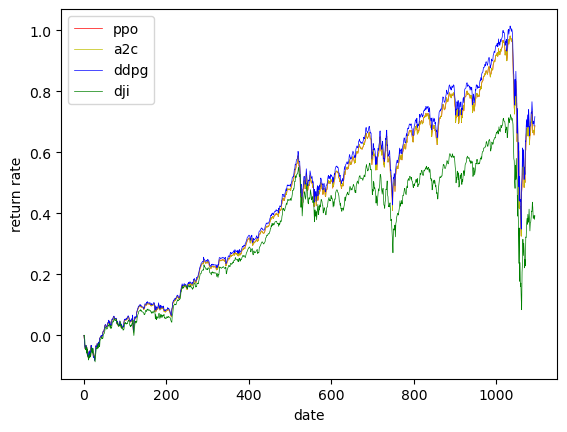

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
labels = ['ppo','a2c','ddpg','dji']
files=['results/return_rate_ppo.csv','results/return_rate_a2c.csv','results/return_rate_ddpg.csv','results/return_rate_dji.csv']
colors = ['r','y','b','g','c','m','k']

for i in range(len(files)):
    return_rate = pd.read_csv(files[i],index_col=0).values
    plt.plot(return_rate-1,'{}-'.format(colors[i]), label=labels[i],linewidth=0.5)

plt.xlabel('date')
plt.ylabel('return rate')
plt.legend()
plt.savefig('results/baseline_return_rate.png')


In [ ]:
# import matplotlib
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np

# files=['results/return_rate_ppo.csv','results/return_rate_a2c.csv','results/return_rate_ddpg.csv','results/return_rate_dji.csv']
# colors = ['r','y','b','g','c','m','k']

# ppo_return_rate = pd.read_csv(files[0],index_col=0).values
# a2c_return_rate = pd.read_csv(files[1],index_col=0).values
# ddpg_return_rate = pd.read_csv(files[2],index_col=0).values
# dji_return_rate = pd.read_csv(files[3],index_col=0).values

# plt.plot(ppo_return_rate,'{}-'.format(colors[0]), label=files[0],linewidth=1)
# plt.plot(a2c_return_rate,'{}-'.format(colors[1]), label=files[1],linewidth=1)
# plt.plot(ddpg_return_rate,'{}-'.format(colors[2]), label=files[2],linewidth=1)
# plt.plot(dji_return_rate,'{}-'.format(colors[3]), label=files[3],linewidth=1)
# plt.xlabel('date')
# plt.ylabel('return_rate')
# plt.legend()
# plt.savefig('results/baseline_return_rate.png')


In [ ]:
pd.read_csv(files[0])

,Unnamed: 0,0
0,0,1.000268
1,1,0.986984
2,2,0.965871
3,3,0.955999
4,4,0.959267
...,...,...
1089,1089,1.664471
1090,1090,1.672268
1091,1091,1.656193
1092,1092,1.671563
